# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot should be inside the notebook
%matplotlib inline

# configure the figure format
%config InlineBackend.figure = 'svg'

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Load Data

In [2]:
df = pd.read_csv('../data/heart-disease.csv')
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

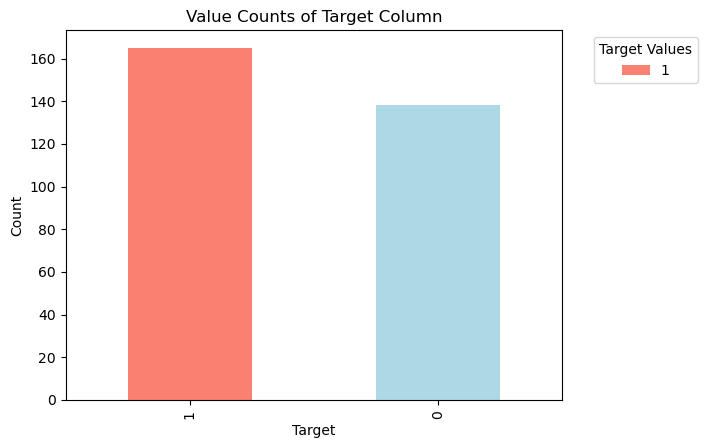

In [6]:
# Assuming df is your DataFrame and it has a column named 'target'
value_counts = df['target'].value_counts()

# Creating a subplot
fig, ax = plt.subplots()

# Plotting the bar chart on the ax subplot
value_counts.plot(kind="bar", color=["salmon", "lightblue"], ax=ax)

# Adding labels and title for better readability
ax.set_xlabel("Target")  # Corrected typo
ax.set_ylabel("Count")
ax.set_title("Value Counts of Target Column")

# Adding a legend
legend_labels = value_counts.index.map(str)  # Create legend labels from the index
legend_labels = ['1', '0']  # Explicitly setting legend labels
ax.legend(legend_labels, title="Target Values", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check the missing value 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


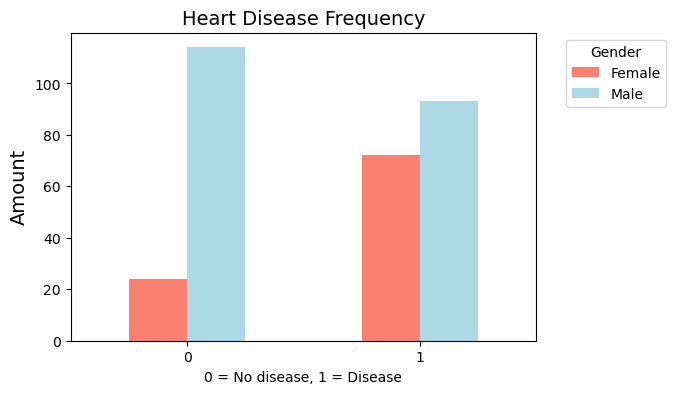

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(6, 4),
                                   color= ["salmon", "lightblue"])

plt.title("Heart Disease Frequency", fontsize=14)
plt.xlabel("0 = No disease, 1 = Disease", fontsize=10)
plt.ylabel("Amount", fontsize=14)
plt.legend(["Female", "Male"], title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0);

### Age & Max Heart rate for Heart Disease

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


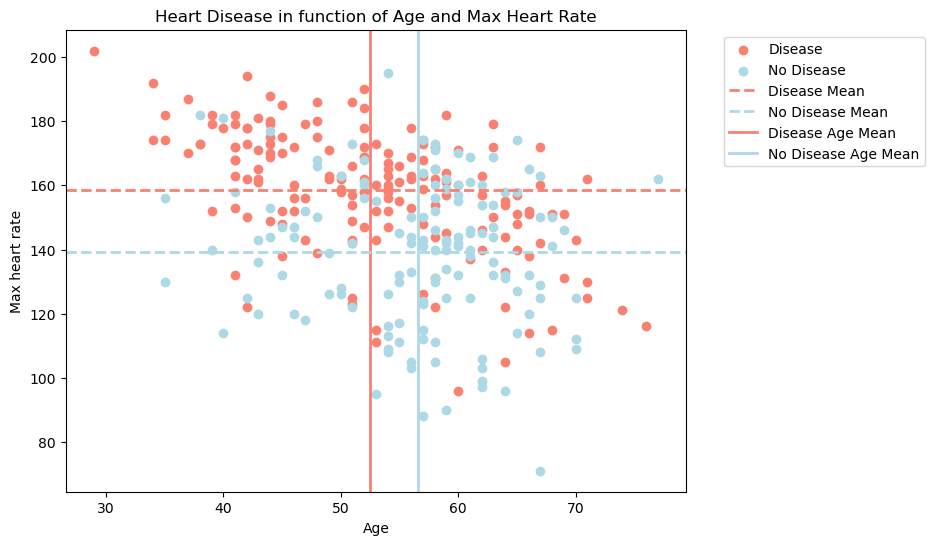

In [14]:
# Create another Figure
plt.figure(figsize=(8, 6))

# Scatter with possitive example
scatter_disease = plt.scatter(df.age[df.target == 1],
                              df.thalach[df.target == 1],
                              color = "salmon",
                              label="Disease")

line_disease_axh = plt.axhline(y=df.thalach[df.target == 1].mean(),
                                color= "salmon",
                                ls= "--",
                                lw = 2,
                                label="Disease Mean")

line_disease_age_mean = plt.axvline(x= df.age[df.target == 1].mean(),
                                    color="salmon",
                                    ls="-",
                                    lw=2,
                                    label="Disease Age Mean")

# Scatte with negative example
scatter_no_disease = plt.scatter(df.age[df.target == 0],
                              df.thalach[df.target == 0],
                              c= "lightblue",
                              label="No Disease")

line_no_disease_axh = plt.axhline(y=df.thalach[df.target == 0].mean(),
                                     color= "lightblue",
                                     ls="--",
                                     lw=2,
                                     label="No Disease Mean")

line_no_disease_age_mean = plt.axvline(x= df.age[df.target == 0].mean(),
                                    color="lightblue",
                                    ls="-",
                                    lw=2,
                                    label="No Disease Age Mean")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(handles= [scatter_disease, scatter_no_disease, line_disease_axh, line_no_disease_axh, line_disease_age_mean, line_no_disease_age_mean],
           bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<AxesSubplot: ylabel='Frequency'>

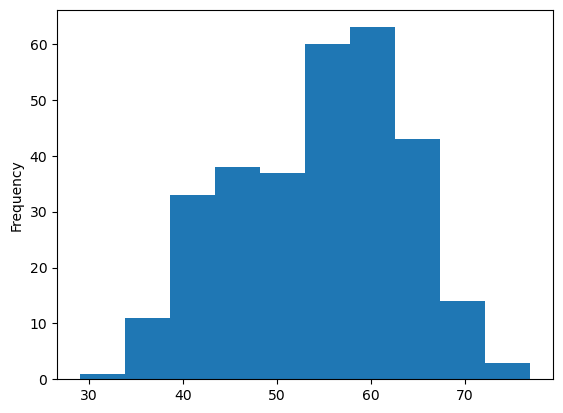

In [15]:
df.age.plot.hist()

In [16]:
cp_target = pd.crosstab(df.cp, df.target)
cp_target

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


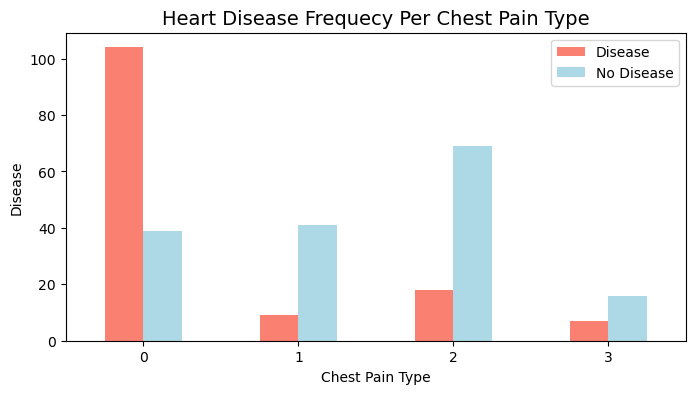

In [17]:
cp_target.plot(kind="bar", figsize=(8, 4), color=["salmon", "lightblue"], label=["Disease", "No Disease"])

plt.title("Heart Disease Frequecy Per Chest Pain Type", fontsize=14)
plt.xlabel("Chest Pain Type", fontsize=10)
plt.ylabel("Disease", fontsize=10)
plt.legend(["Disease", "No Disease"], fontsize=10)
plt.xticks(rotation=0);

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


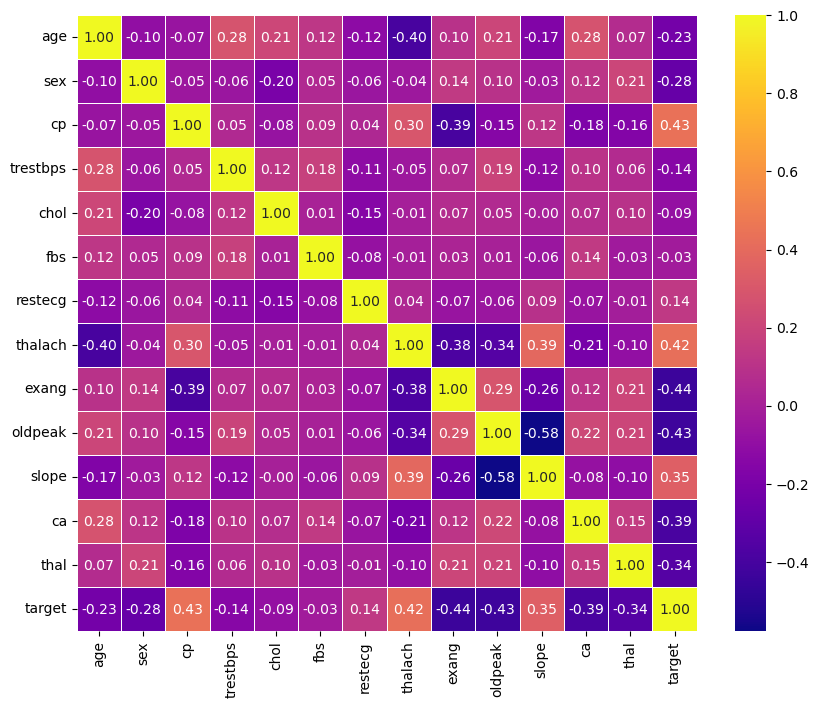

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap="plasma", fmt='.2f', linewidths=0.4)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# 5. Modeling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = df.drop("target", axis=1)
y = df["target"]

In [23]:
# Split the data into train and test
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier

# Define the models you want to use to fit and score

models = {
    "Logistics Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "G Boosting": HistGradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier()
}

In [51]:
# Create a function to fit and score the model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    model : a dict of different Scikit-Learn machine learning model.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels 
    """
    # Set random seed
    np.random.seed(42)
    
    # Make dict to keep model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [52]:
model_scores = fit_and_score(models=models,
                      X_train=X_train,
                      X_test=X_test,
                      y_train=y_train,
                      y_test=y_test)
model_scores

C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Logistics Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'G Boosting': 0.819672131147541,
 'Ada Boost': 0.8032786885245902}

## Model comparison

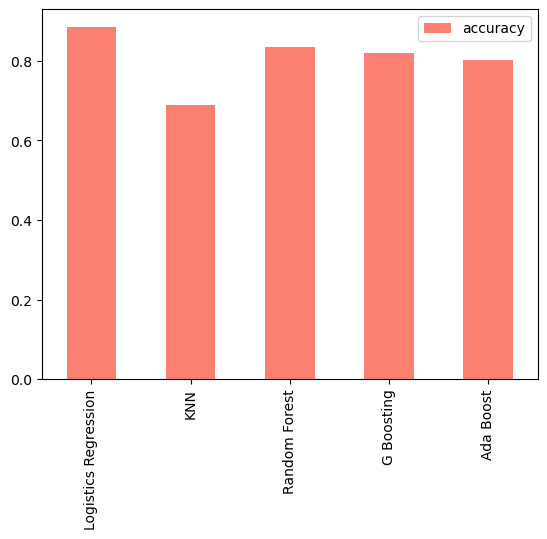

In [56]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="salmon");

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [69]:
# let's tune the KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data:  75.41%


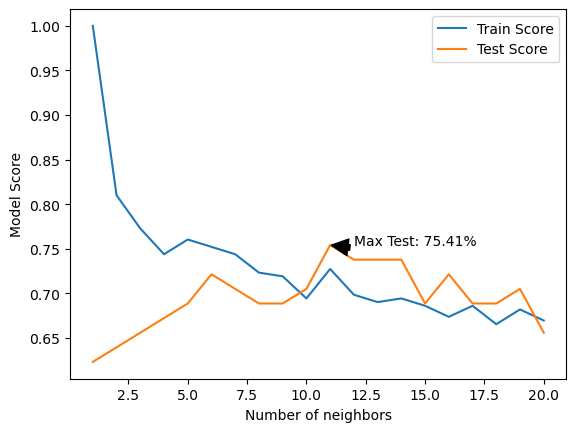

In [74]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_score, label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

# Find and annotate the max values for training and testing scores
# max_train_index = train_scores.index(max(train_scores))
max_test_index = test_scores.index(max(test_scores))

# plt.annotate(f"Max Train: {train_scores[max_train_index]:.2f}", 
#              xy=(neighbors[max_train_index], train_scores[max_train_index]), 
#              xytext=(neighbors[max_train_index]+1, train_scores[max_train_index]),
#              arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f"Max Test: {test_scores[max_test_index]*100:.2f}%", 
             xy=(neighbors[max_test_index], test_scores[max_test_index]), 
             xytext=(neighbors[max_test_index]+1, test_scores[max_test_index]),
             arrowprops=dict(facecolor='black', shrink=0.05))

print(f"Maximum KNN score on the test data: {max(test_scores)*100: .2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [77]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

# Define the parameter grid for RandomForestClassification
rf_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [78]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 200, 300, 400, 500],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   verbose=True)

In [80]:
rs_log_reg.best_params_

{'solver': 'lbfgs', 'max_iter': 400, 'C': 11.288378916846883}

In [81]:
rs_log_reg.best_estimator_

LogisticRegression(C=11.288378916846883, max_iter=400)

In [82]:
rs_log_reg.best_score_

0.8221938775510204

In [90]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [85]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           n_iter=20,cv=5,
                           verbose=True)

# Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hamed PC\anaconda3\Li

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=True)

In [86]:
rs_rf.best_estimator_

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       n_estimators=700)

In [87]:
rs_rf.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [88]:
rs_rf.best_score_

0.8221938775510204

In [89]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [91]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

# Setup grid hyperparameter search for our logisticRegression model
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hamed PC\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300, 400, 500],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=True)

In [92]:
# Check the best param
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'max_iter': 100, 'solver': 'liblinear'}

In [93]:
gs_log_reg.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [94]:
gs_log_reg.best_score_

0.8346088435374149

In [95]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### GridSearch for RandomForestClassification

In [ ]:
# # Define the parameter grid for RandomForestClassification
# rf_grid = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # Setup grid hyperparameter search for our RandomForestClassification model
# gs_rf = GridSearchCV(estimator=RandomForestClassifier(),
#                     param_grid=rf_grid,
#                     cv=5,
#                     verbose=True)

# # Fit the model
# gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.